<a href="https://colab.research.google.com/github/emirsav/ProjectNumericalMethods2023/blob/main/Project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from IPython import display


In [ ]:
t, m, g = smp.symbols('t m g')                  #t for function  m=mass g=gravity
the = smp.symbols(r'\theta', cls=smp.Function)  #theta
the = the(t)
theD = smp.diff(the, t)                         #Derivative of the
theDD = smp.diff(theD, t)                       #Derivative of theD

In [ ]:
x, y = smp.symbols('x y', cls=smp.Function)     #x and y are functions of the
x = x(the)
y = y(the)

In [ ]:
path='parab'
if path=='taut':                                #if its taut x=sin(2the)+2the  y=1-cos(2the)
    x = smp.sin(2*the) + 2*the
    y = 1 - smp.cos(2*the)
    xf = smp.lambdify(the, x)                  # change the with x 
    yf = smp.lambdify(the, y)                  # change the with y
if path=='parab':                               #if its parabola x=the   y=the**2
    x = the
    y = the**2
    xf = smp.lambdify(the, x) 
    yf = smp.lambdify(the, y)

In [ ]:
T = 1/2 * m * (smp.diff(x,t)**2 + smp.diff(y,t)**2)  #Kinetic Energy formula
V = m*g*y                                            #Potential Energy formula
L = T-V                                              #Lagragien formula

In [ ]:
LE = smp.diff(L, the) - smp.diff(smp.diff(L, theD), t)  #Lagrange formula
LE = LE.simplify()                                      #simplify


In [ ]:
deriv2 =smp.solve(LE, theDD)[0]                         # this will give dthe**2/dt**2
deriv1 = theD                                           #omega
#dthe/dt=w(omega)
#dw/dt=d**2the/dt**2


In [ ]:
deriv2f = smp.lambdify((g, the, theD), deriv2)         #lamdify function to put in variables
deriv1f = smp.lambdify(theD, theD)

In [ ]:
def dSdt(S, t):
    return [
        deriv1f(S[1]), #dtheta/dt
        deriv2f(g, S[0], S[1]) #domega/dt
    ]

In [ ]:
t = np.linspace(0, 20, 1000)                      #20 times 1000 points 50 times per second
g = 9.81                                          #law of gravity
ans1 = odeint(dSdt, y0=[np.pi/4, 0], t=t)         
ans2 = odeint(dSdt, y0=[np.pi/5, 0], t=t)

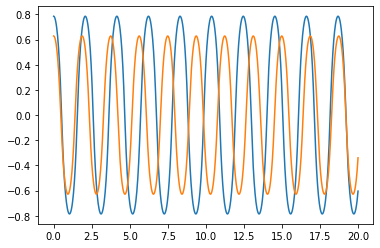

In [ ]:
plt.plot(t,ans1.T[0])
plt.plot(t,ans2.T[0])

In [ ]:
def get_xy(theta):
    return xf(theta), yf(theta)                  #get x and y

In [ ]:
x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

In [ ]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])   #coordinates of x and y 
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)          #figure       
ax.grid()                            #grid
ln1, = plt.plot([], [], 'ro')        #empty lines for first and second animations
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1,4)                   #setting limits
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=50)
video = ani.to_html5_video()          #converting animation to html 
html = display.HTML(video)
display.display(html)
plt.close()                           